### Matplotlibによるグラフ描画
- フィギュア：サブプロットを描画する領域
- サブプロット：グラフを描画するための領域

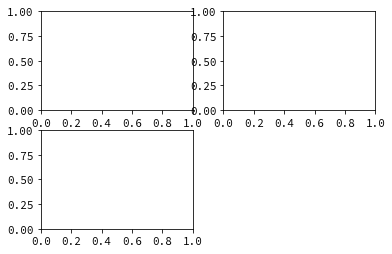

In [1]:
# グラフ準備（丁寧な書き方）
import matplotlib.pyplot as plt

# フィギュアの生成
fig = plt.figure()

# フィギュア内にサブプロットを3つ配置する。
ax1 = fig.add_subplot(221) #2行2列の1番目
ax2 = fig.add_subplot(222) #2行2列の2番目
ax3 = fig.add_subplot(223) #2行2列の3番目

plt.show()

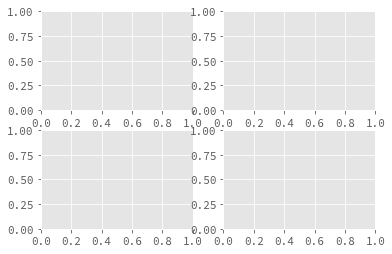

In [18]:
# グラフの準備（簡単な書き方）
fig, axes = plt.subplots(2,2) #2行2列のサブプロットをインスタントに用意する。
plt.show()

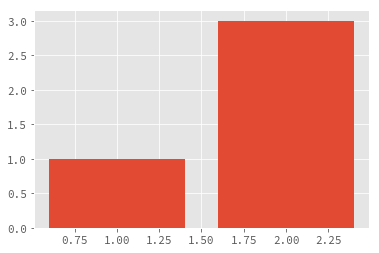

In [2]:
# 棒グラフ
plt.style.use('ggplot') #目盛線を引くスタイル。
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1,2]
y = [1,3]

ax.bar(x,y) #棒グラフを挿入する。

plt.show()

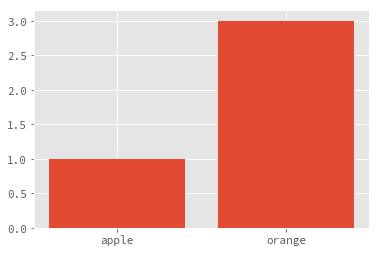

In [3]:
#（書き方1）x軸の目盛ラベルを付与する。
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ['apple', 'orange']
ax.bar(x,y, tick_label=labels) 

plt.show()

In [ ]:
#（書き方2）x軸の目盛ラベルを付与する。
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x,y)

ax.set_xticks(x) #x軸目盛の設定
ax.set_xticklabels(labels) #x軸目盛ラベルの設定

plt.show()

In [2]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')

dfac = pd.read_csv(anime_master_csv)

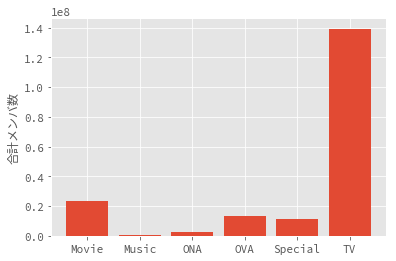

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

y = dfac.groupby('type').sum()['members']
x = range(len(y))

xlabels = y.index
ax.bar(x,y,tick_label=xlabels)
ax.set_ylabel('合計メンバ数')

plt.show()

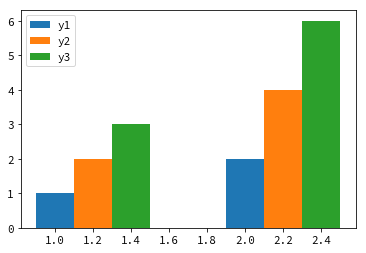

In [3]:
# 複数グループの棒グラフの描画
import numpy as np
x = [1,2]
y1, y2, y3 = [1,2], [2,4], [3,6]

fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x,y1, width=w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w * 2, y3, width=w, label='y3')

ax.legend()

plt.show()

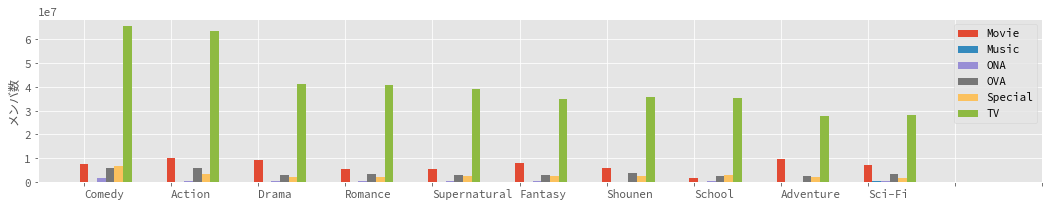

In [39]:
# 複数グループの棒グラフ
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')

fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w

ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('メンバ数')
# ax.set_yscale('log') #対数軸にして視認性を高める場合、コメントアウトを外す。
ax.legend()

plt.show()

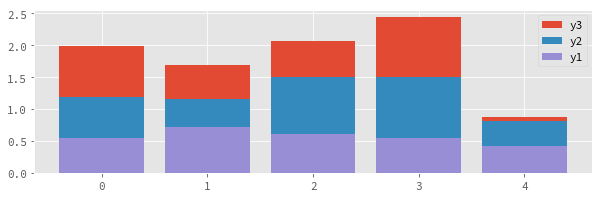

In [46]:
# 積み上げ棒グラフを作成する。
# 後から書いた棒で上書きされる仕様を利用して、先に各項の和を描画し、次に（各項-1）の和を描画し、...を繰り返す。
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3,5))
y1,y2,y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

ax.legend()

plt.show()

In [ ]:
# 3グループ以内なら、もっと楽に積み上げ棒グラフを書く方法がある。：bottom
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3, bottom=y2b, label='y3')
ax.bar(x, y2, bottom=y1b, label='y2')
ax.bar(x, y1, label='y1')

ax.legend()

plt.show()

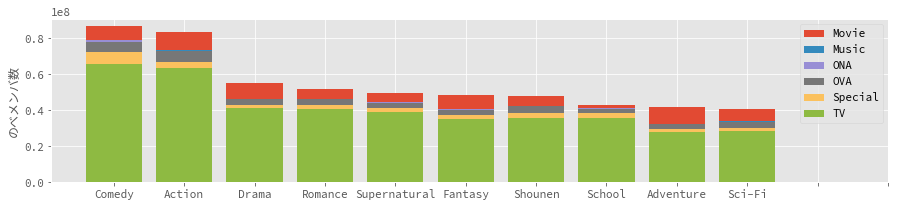

In [50]:
# DataFrameを用いた積み上げ棒グラフの書き方
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i, t in enumerate(dfag.columns):
    y = dfag.iloc[:, i:cols].sum(axis=1)
    
    ax.bar(x,y,label=t)

ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('のべメンバ数')
ax.legend()
plt.show()

In [15]:
# ファイルを出力する。指定できる拡張子は「PNG」「PDF」「PS」「EPS」「SVG」
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [1,3,2]

ax.plot(dat)

fname = 'C:/Users/一起/Desktop/save_fig.png'
plt.savefig(fname, dpi=300, bbox_inches='tight') #dpi=300は解像度の指定、bbox_inchesは余白の設定。

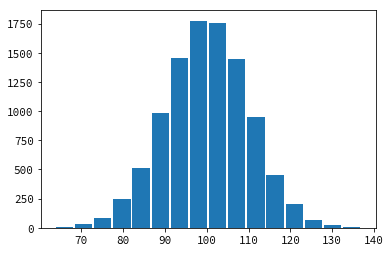

In [5]:
# ヒストグラムを作成する
mu = 100 #平均値
sigma = 10 #標準偏差
np.random.seed(10)

x = np.random.normal(mu, sigma, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)
plt.show()

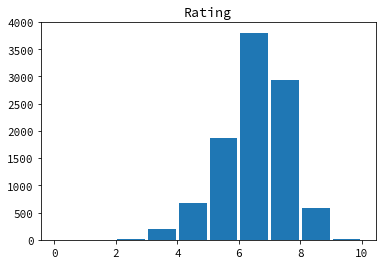

In [10]:
# DataFrameを利用したヒストグラム
df = pd.read_csv(anime_master_csv, index_col='anime_id')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], range=(0,10), rwidth=0.9)
ax.set_title('Rating')
plt.show()

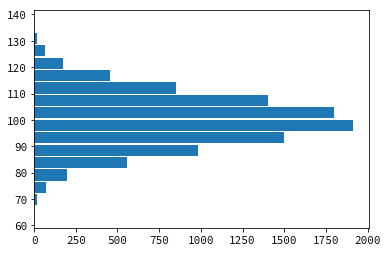

In [11]:
# 横向きのヒストグラム
np.random.seed(0)
x = np.random.normal(100, 10, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')
plt.show()

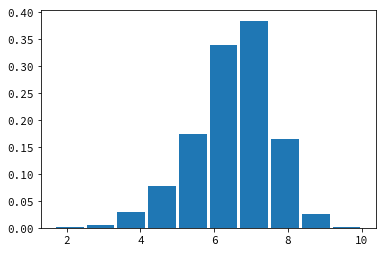

In [12]:
# 相対度数表示
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], normed=True, rwidth=0.9)
plt.show()

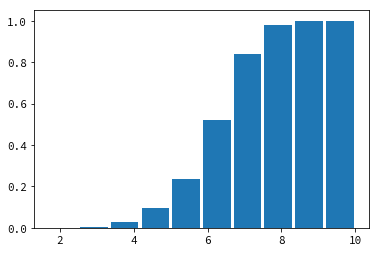

In [13]:
# 累積度数図
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], normed=True, cumulative=True, rwidth=0.9)
plt.show()

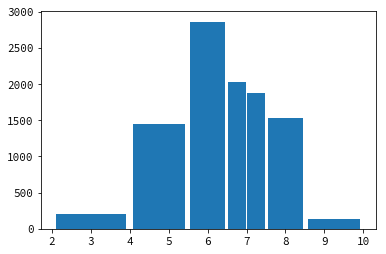

In [15]:
# 階級幅の変更
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth=0.9)
plt.show()

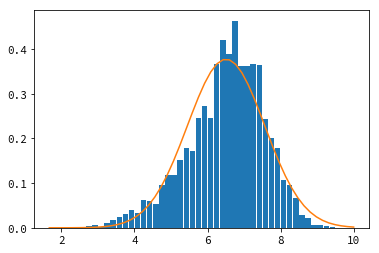

In [16]:
# 近似曲線の追加
bins = 50
dfmin = np.min(df['rating'])
dfmax = np.max(df['rating'])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=bins, range=(dfmin,dfmax), normed=True, rwidth=0.9)

mu, sigma = df['rating'].mean(), df['rating'].std()

x = np.linspace(dfmin, dfmax, bins) #ビンの区切りの値

# 近似的な確率密度関数を使用してY値を生成
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax.plot(x,y)

plt.show()

### 参考
- pandasのグラフ描画メソッド:plot()

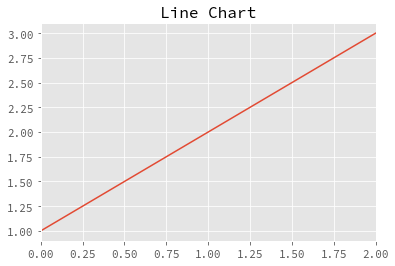

In [13]:
# Seriesのグラフ描画。デフォルトでは、Seriesのインデックスがｘ軸、値がy軸。
ax = pd.Series([1,2,3]).plot()
ax.set_title('Line Chart')
plt.show()

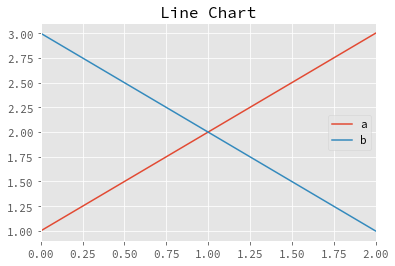

In [14]:
# データフレームのグラフ描画
df = pd.DataFrame({'a':[1,2,3], 'b':[3,2,1]})
ax = df.plot()
ax.set_title('Line Chart')
plt.show()

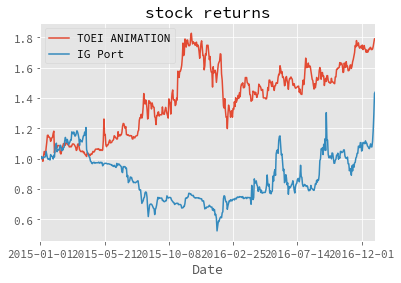

In [15]:
# 折れ線グラフの描画
anime_stock_returns_csv = os.path.join(base_url, 'anime_stock_returns.csv')
anime_stock_returns_df = pd.read_csv(anime_stock_returns_csv, index_col=0)
ax = anime_stock_returns_df.plot()
ax.set_title('stock returns')
plt.show()

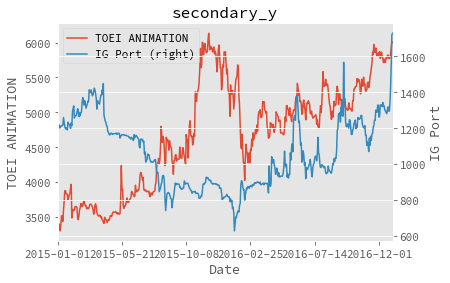

In [17]:
# 折れ線グラフ（第二軸）の描画
anime_stock_price_csv = os.path.join(base_url, 'anime_stock_price.csv')
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0)
ax = anime_stock_price_df.plot(secondary_y=['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMATION')
ax.right_ax.set_ylabel('IG Port')
plt.show()

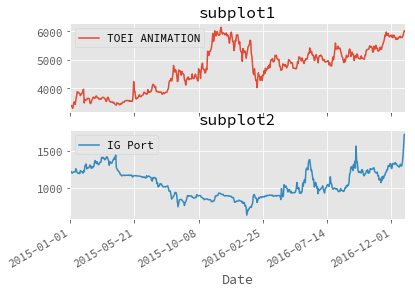

In [18]:
# 複数の図に分割する場合
ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

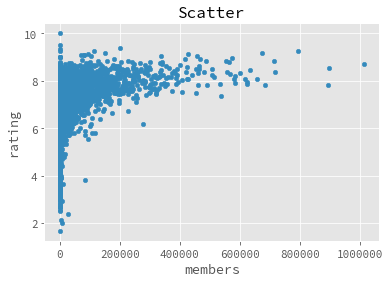

In [25]:
# 撒布図の描画
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

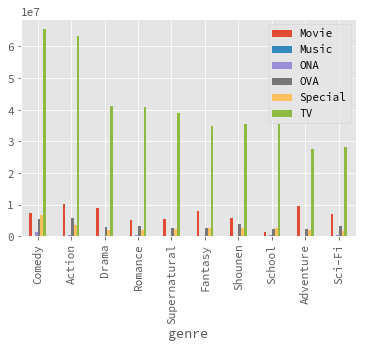

In [20]:
# 棒グラフを作成する。
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

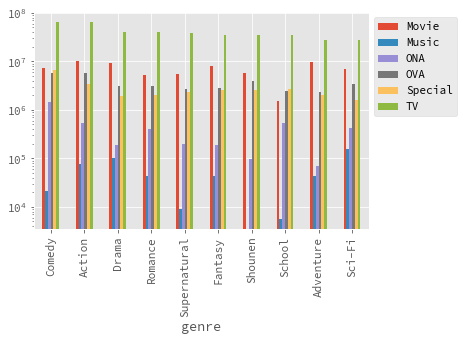

In [23]:
# 対数軸に変更する場合
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

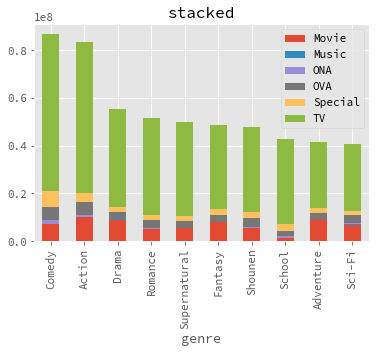

In [24]:
# 積み上げ棒グラフにする場合
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('stacked')
plt.show()

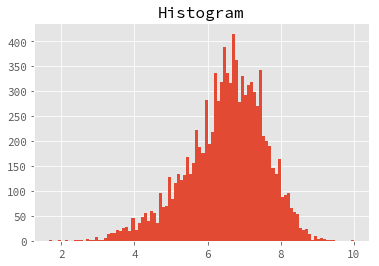

In [26]:
# ヒストグラフを作成する
ax = anime_master_df['rating'].hist(bins=100)
ax.set_title('Histogram')
plt.show()

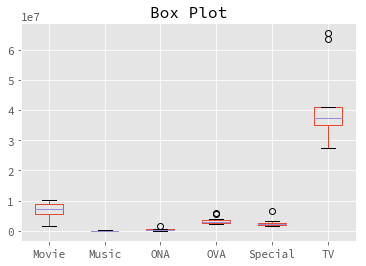

In [27]:
# 箱ひげ図を作成する
ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')
plt.show()

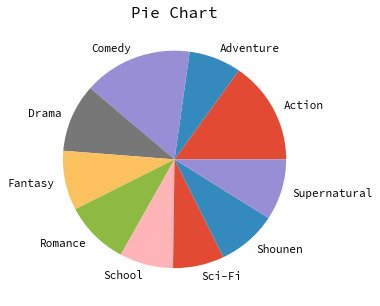

In [30]:
# 円グラフを作成する
anime_genre_top10_csv = os.path.join(base_url, 'anime_genre_top10.csv')
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)
ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5,5))
ax.set_title('Pie Chart')
ax.set_ylabel('') #y軸ラベルを削除
plt.show()